In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import pandas as pd

In [2]:
N = 3
t1 = -1
t2 = -1.2

In [3]:
def mat_plot(matrix):
    # plt.grid()
    plt.imshow(matrix, cmap='YlOrBr')
    plt.colorbar()
    plt.show()

def kron_sum(A, B):
    return np.kron(A, np.eye(B.shape[0]))+np.kron(np.eye(A.shape[0]),B)

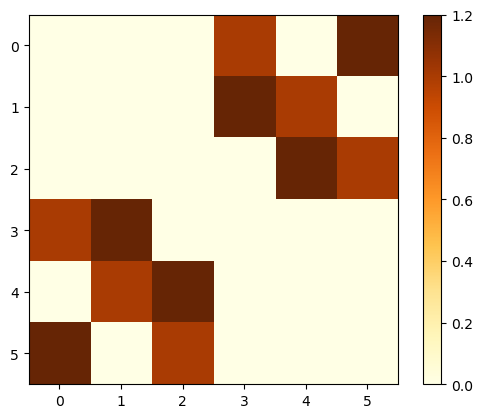

In [4]:
H = np.zeros((2*N,2*N))

for i in range(N, 2*N):
    H[i, i-N]=-t1
    H[i-N,i]=-t1
for i in range(N,2*N-1):
    H[i,i-N+1]=-t2
    H[i-N+1,i]=-t2
H[-1,0],H[0,-1]=(-t2,-t2)

# pd.DataFrame(H)
mat_plot(H)

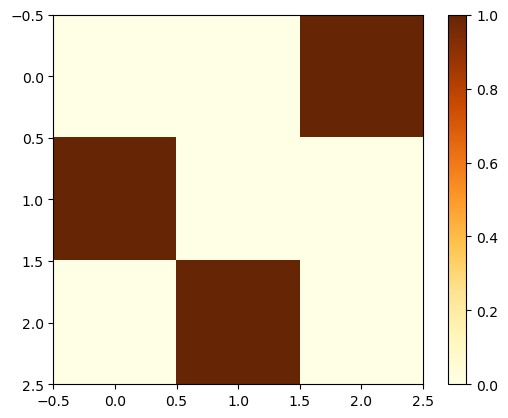

In [5]:
U = np.zeros((N,N))

for i in range(N-1):
    U[i+1,i] = 1
else:
    U[0,N-1] = 1

mat_plot(U)

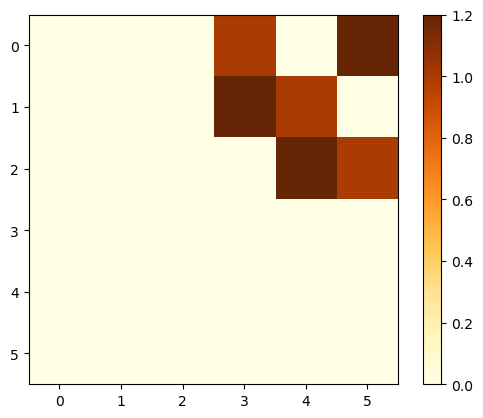

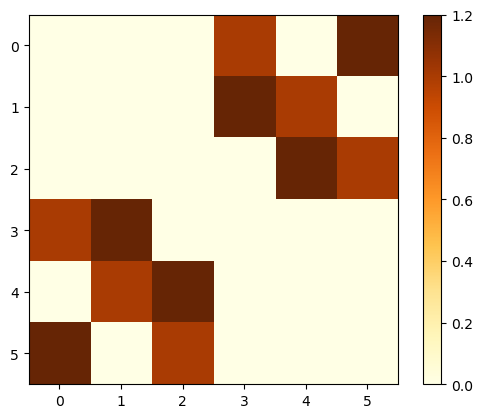

In [6]:
kron_matrix = np.array([[0,1],[0,0]])

trans_mat = (-t2)*U + (-t1)*np.eye(N)
trans_mat = np.kron(kron_matrix, trans_mat)

H_ = trans_mat + trans_mat.conj().T

mat_plot(trans_mat)
mat_plot(H_)

C:\Users\freak\AppData\Local\Temp\ipykernel_6456\4143266.py:6: RuntimeWarning: divide by zero encountered in log
  mat_plot((np.log(P_matrix)).real)


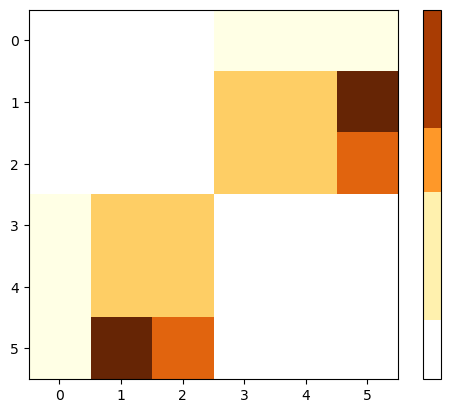

In [7]:
vals, vecs = np.linalg.eig(U)

P_matrix = np.kron(kron_matrix, vecs) + np.kron(kron_matrix, vecs).T

# mat_plot(1j*np.log(vals)
mat_plot((np.log(P_matrix)).real)

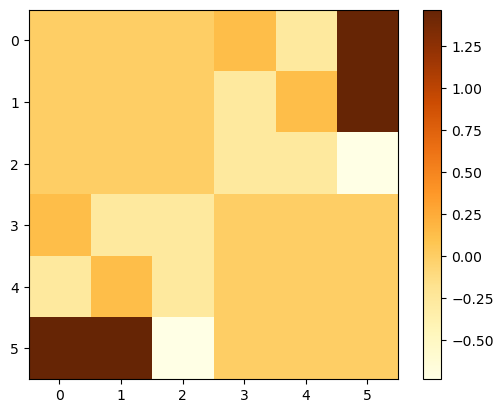

In [8]:
mat_plot((P_matrix.conj().T @ H_ @ P_matrix).real)

In [12]:
state = np.zeros((N,1))
i = 1
state[i] = 1

print(H_ @ np.kron(kron_matrix,state))


[[0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  1.2]
 [0.  1. ]
 [0.  0. ]]


In [13]:
print(H_)


[[0.  0.  0.  1.  0.  1.2]
 [0.  0.  0.  1.2 1.  0. ]
 [0.  0.  0.  0.  1.2 1. ]
 [1.  1.2 0.  0.  0.  0. ]
 [0.  1.  1.2 0.  0.  0. ]
 [1.2 0.  1.  0.  0.  0. ]]
